Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


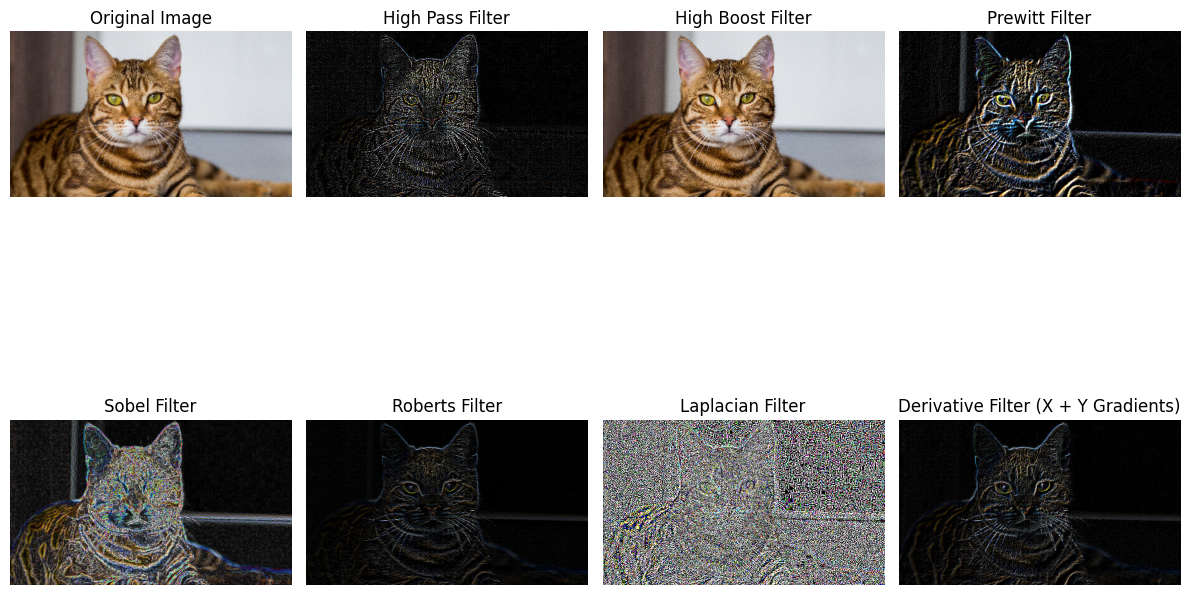

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Load and display the image from Google Drive
img_path = '/content/drive/MyDrive/CATTO.png'  # Update the path to your image
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError(f"Image at {img_path} not found.")

# Create a figure with a larger size
plt.figure(figsize=(12, 10))

# Display the original image
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# 1. High Pass Filter
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

high_pass_img = np.zeros_like(img)
for i in range(3):
    high_pass_img[:, :, i] = cv2.filter2D(img[:, :, i], -1, high_pass_kernel)

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(high_pass_img, cv2.COLOR_BGR2RGB))
plt.title("High Pass Filter")
plt.axis('off')

# 2. High Boost Filter
A = 1.5  # Boost factor
low_pass_img = np.zeros_like(img)
for i in range(3):
    low_pass_img[:, :, i] = cv2.GaussianBlur(img[:, :, i], (5, 5), 0)

high_boost_img = cv2.addWeighted(img, A, low_pass_img, 1 - A, 0)

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(high_boost_img, cv2.COLOR_BGR2RGB))
plt.title("High Boost Filter")
plt.axis('off')

# 3. Prewitt Filter
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

prewitt_img = np.zeros_like(img)
for i in range(3):
    prewitt_x_img = cv2.filter2D(img[:, :, i], -1, prewitt_x)
    prewitt_y_img = cv2.filter2D(img[:, :, i], -1, prewitt_y)
    prewitt_img[:, :, i] = cv2.add(prewitt_x_img, prewitt_y_img)

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(prewitt_img, cv2.COLOR_BGR2RGB))
plt.title("Prewitt Filter")
plt.axis('off')

# 4. Sobel Filter
sobel_img = np.zeros_like(img)
for i in range(3):
    sobel_x = cv2.Sobel(img[:, :, i], cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img[:, :, i], cv2.CV_64F, 0, 1, ksize=3)
    sobel_img[:, :, i] = cv2.magnitude(sobel_x, sobel_y)

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB))
plt.title("Sobel Filter")
plt.axis('off')

# 5. Roberts Filter
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

roberts_img = np.zeros_like(img)
for i in range(3):
    roberts_x_img = cv2.filter2D(img[:, :, i], -1, roberts_x)
    roberts_y_img = cv2.filter2D(img[:, :, i], -1, roberts_y)
    roberts_img[:, :, i] = cv2.add(roberts_x_img, roberts_y_img)

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(roberts_img, cv2.COLOR_BGR2RGB))
plt.title("Roberts Filter")
plt.axis('off')

# 6. Laplacian Filter
laplacian_img = np.zeros_like(img)
for i in range(3):
    laplacian_img[:, :, i] = cv2.Laplacian(img[:, :, i], cv2.CV_64F)

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(laplacian_img, cv2.COLOR_BGR2RGB))
plt.title("Laplacian Filter")
plt.axis('off')

# 7. Derivative Filter
# Applying a simple derivative filter on the X and Y directions for each channel
derivative_x = np.array([[1, -1], [1, -1]])
derivative_y = np.array([[1, 1], [-1, -1]])

derivative_img = np.zeros_like(img)
for i in range(3):
    derivative_x_img = cv2.filter2D(img[:, :, i], -1, derivative_x)
    derivative_y_img = cv2.filter2D(img[:, :, i], -1, derivative_y)
    derivative_img[:, :, i] = cv2.add(derivative_x_img, derivative_y_img)

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(derivative_img, cv2.COLOR_BGR2RGB))
plt.title("Derivative Filter (X + Y Gradients)")
plt.axis('off')

# Show all images
plt.tight_layout()
plt.show()
